In [65]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis y decisión sobre datos faltantes.

Un 50% de nulls en una fila -> se borra ya que se considera que es un dato creado artificialmente en caso de rellenarlo por imputacion. Verificar que no se borre una gran cantidad de filas al realizar esto.

Si la variable de salida es NULL, esa fila se borrará también

Para el resto de los datos null, se realizarán imputaciones dependiendo de su distribución y tipo de variable.

- Asimetría -> mediana
- Normal -> Media
- Bimodal y Categorica -> KNN


In [66]:
#Carga de dataset
df = pd.read_csv('house-prices-tp.csv')

In [67]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


Si tenemos una observacion faltante en la variable respuesta, no sirve, asi que la podemos sacar antes de separar en train y test

In [68]:
# Analizamos los Null
df.isna().sum()

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64

Hay que tener cuidado cuando decimos que solo tenemos 5% de nulls, ya que estos nulls pueden estar distribuidos de distintas maneras segun la fila, y puede terminar siendo mucho mas
Por eso hay que ver la cantidad total de filas que tienen null, y ver cuántas se quitan con nuestro Drop NA.

Para la imputacion, está bien considerar las variables categoricas, cuanto más detallados seamos y cuanto menos generalicemos a la hora de imputar, mejor
Se puede usari mputacion KNN para categoricas.

In [69]:
con_null = df.shape[0]

In [70]:
# Nos quedamos solo con aquellas rows con al menos 7 variables no Null
df = df.dropna(thresh=7)
df.isna().sum()

CRIM        9
ZN         12
INDUS       1
CHAS        9
NOX         9
RM          7
AGE        11
DIS         4
RAD        14
TAX         9
PTRATIO    12
B           7
LSTAT       8
MEDV        6
dtype: int64

In [80]:
sin_null = df.shape[0]
print(f'Cantidad de filas en el dataset al comienzo: {con_null}\nCantidad de filas en el dataset luego de quitar nulls: {sin_null}\nFilas perdidas: {con_null - sin_null}\nPorcentaje de filas perdidas: {round((con_null-sin_null)*100/con_null,2)}')
# 3%

Cantidad de filas en el dataset al comienzo: 556
Cantidad de filas en el dataset luego de quitar nulls: 538
Filas perdidas: 18
Porcentaje de filas perdidas: 3.24


drop NA columna salida
KNN para bimodal y categorica

division entre train y test

In [72]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,529.000000,526.000000,537.000000,529.000000,529.000000,531.000000,527.000000,534.000000,524.000000,529.000000,526.000000,531.000000,530.000000,532.000000
mean,5.535502,12.624164,11.268582,0.088847,0.559842,6.293028,67.715576,3.900309,9.676160,409.845029,18.424737,348.929309,12.932321,22.754873
std,13.342670,24.441952,6.939672,0.284792,0.119542,0.773653,28.410360,2.213189,8.698751,168.143583,2.195524,98.630592,7.507540,9.484397
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083870,0.000000,5.130000,0.000000,0.453000,5.877500,42.350000,2.110100,4.000000,279.000000,17.000000,370.520000,7.125000,16.775000
50%,0.299160,0.000000,9.690000,0.000000,0.538000,6.209000,76.500000,3.304487,5.000000,334.000000,19.000000,390.910000,11.395000,21.300000
75%,4.752370,20.000000,18.100000,0.000000,0.642982,6.638500,93.850000,5.287300,24.000000,666.000000,20.200000,395.960000,17.157500,26.250000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [73]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  529.000000  526.000000  537.000000  529.000000  529.000000  531.000000   
mean     5.535502   12.624164   11.268582    0.088847    0.559842    6.293028   
std     13.342670   24.441952    6.939672    0.284792    0.119542    0.773653   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083870    0.000000    5.130000    0.000000    0.453000    5.877500   
50%      0.299160    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      4.752370   20.000000   18.100000    0.000000    0.642982    6.638500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  527.000000  534.000000  524.000000  529.000000  526.000000  531.000000   
mean    67.715576    3.900309    9.676160  409.845029   18.424737  348.929309   
std     28.410360    2.2131

CRIM
count    529.000000
mean       5.535502
std       13.342670
min        0.006320
25%        0.083870
50%        0.299160
75%        4.752370
max       88.976200
Name: CRIM, dtype: float64 



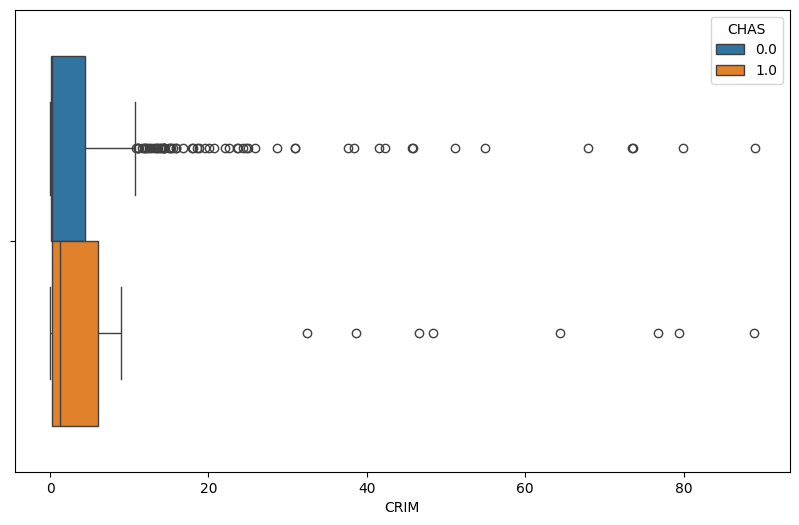

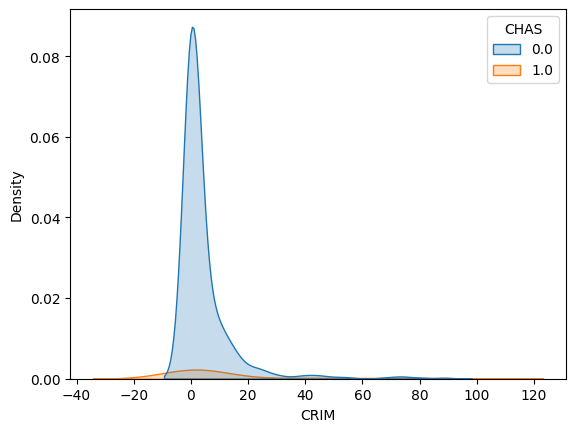

ZN
count    526.000000
mean      12.624164
std       24.441952
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64 



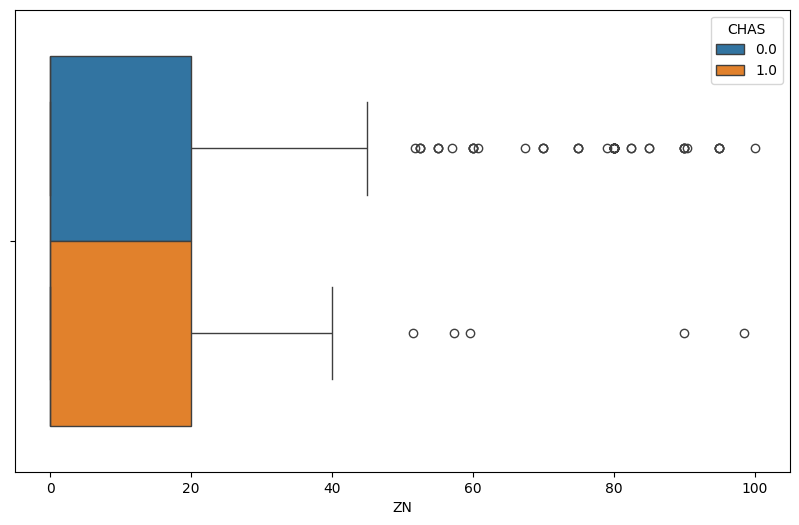

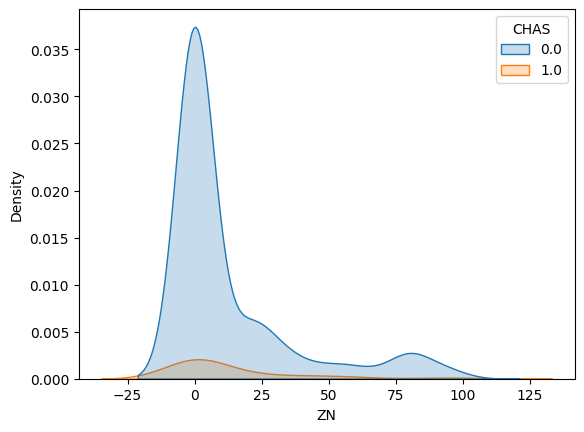

INDUS
count    537.000000
mean      11.268582
std        6.939672
min        0.460000
25%        5.130000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64 



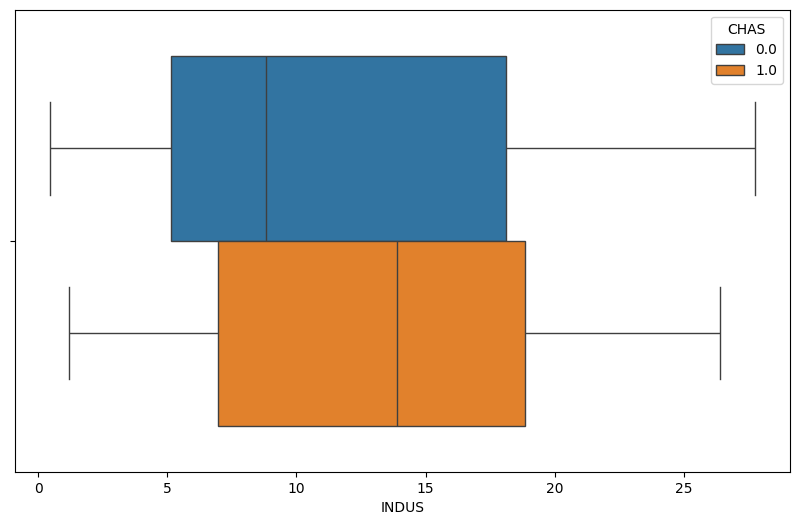

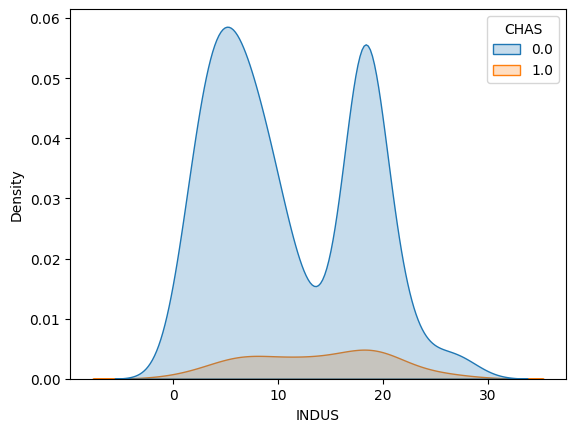

CHAS
count     529.0
unique      2.0
top         0.0
freq      482.0
Name: CHAS, dtype: float64 



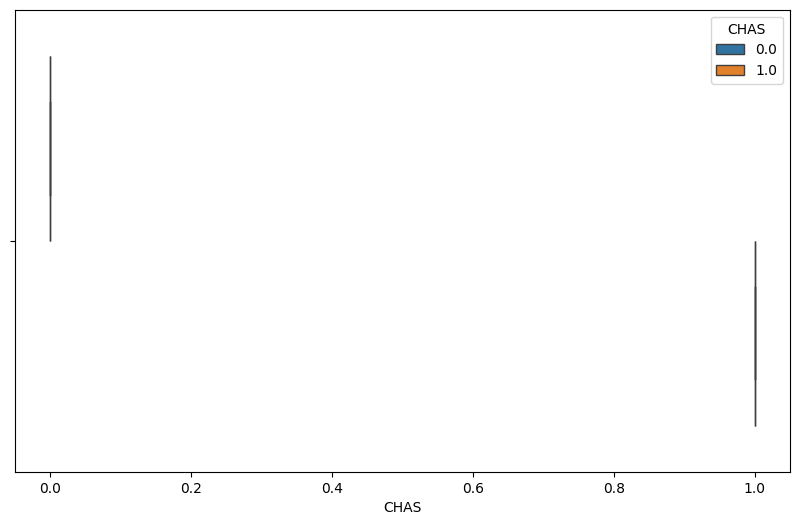

C:\Users\rocio\AppData\Local\Temp\ipykernel_7468\1430679033.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x=columna,fill=True,hue='CHAS')


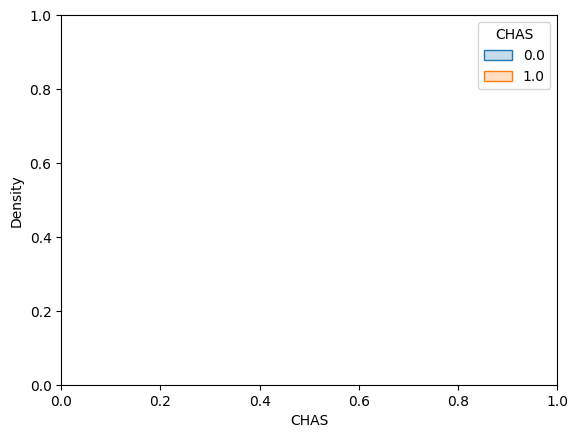

NOX
count    529.000000
mean       0.559842
std        0.119542
min        0.385000
25%        0.453000
50%        0.538000
75%        0.642982
max        0.871000
Name: NOX, dtype: float64 



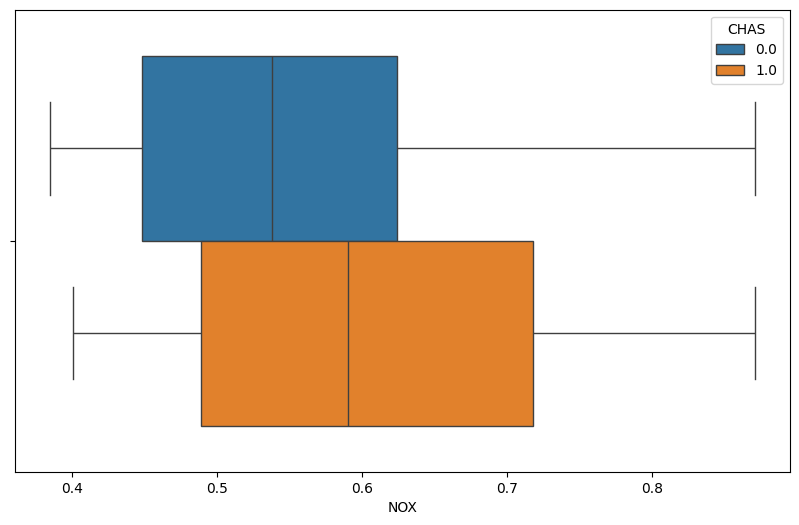

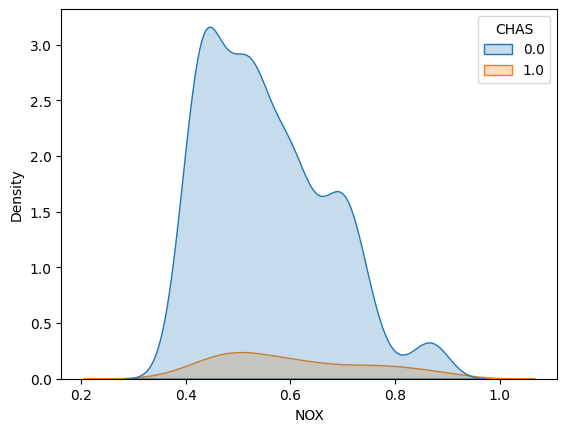

RM
count    531.000000
mean       6.293028
std        0.773653
min        3.561000
25%        5.877500
50%        6.209000
75%        6.638500
max        8.780000
Name: RM, dtype: float64 



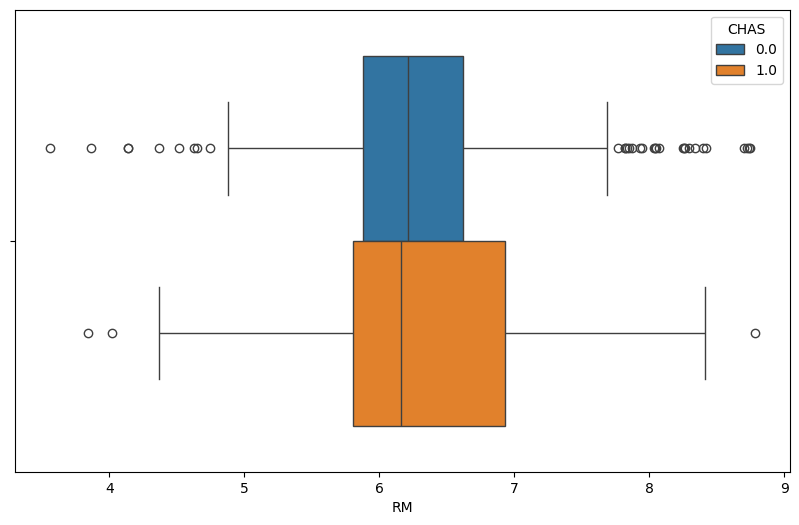

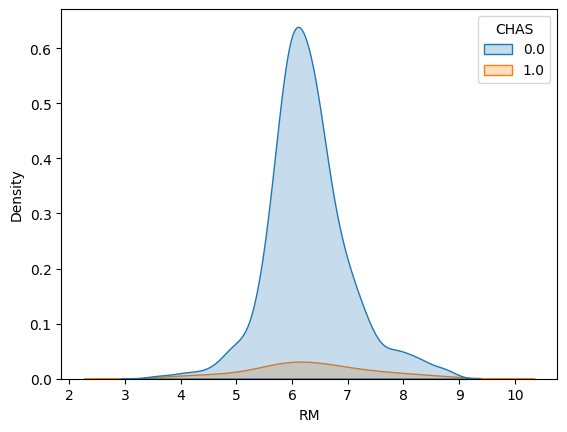

AGE
count    527.000000
mean      67.715576
std       28.410360
min        2.900000
25%       42.350000
50%       76.500000
75%       93.850000
max      100.000000
Name: AGE, dtype: float64 



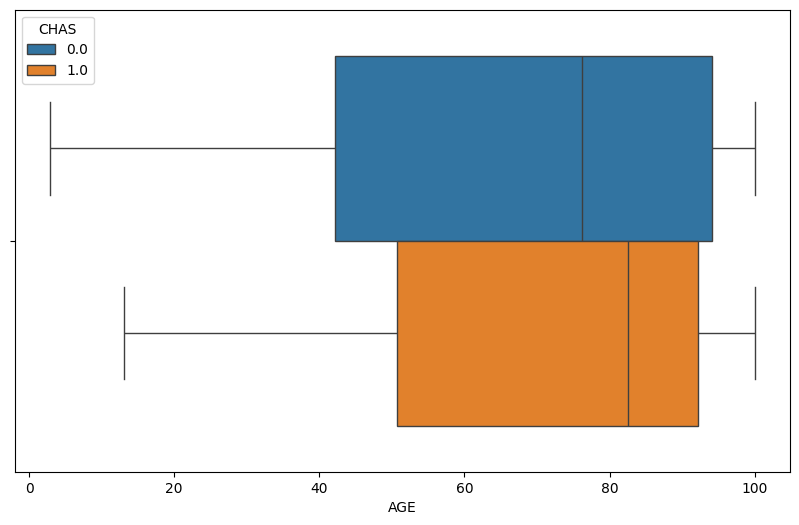

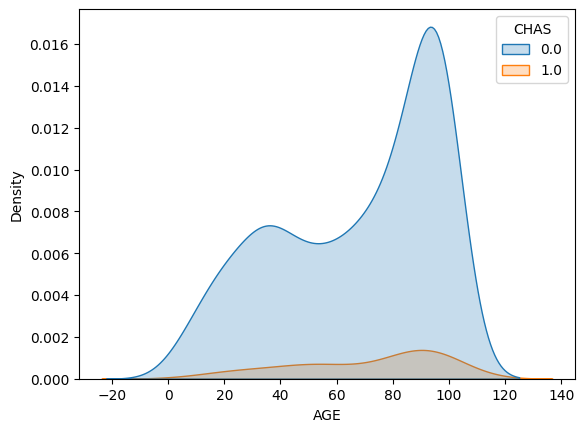

DIS
count    534.000000
mean       3.900309
std        2.213189
min        1.129600
25%        2.110100
50%        3.304487
75%        5.287300
max       12.126500
Name: DIS, dtype: float64 



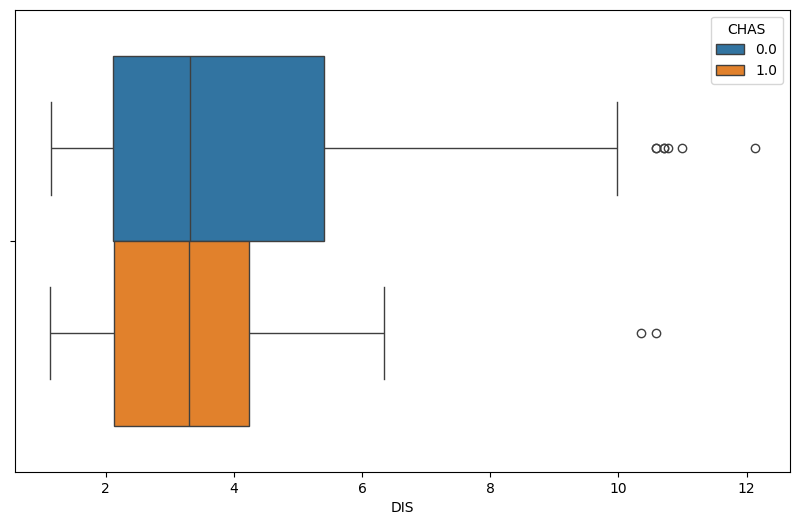

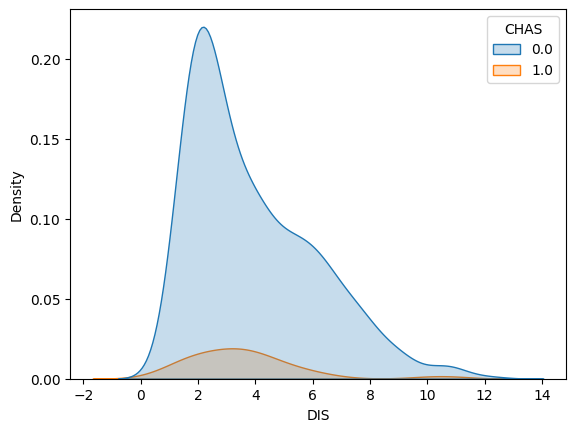

RAD
count    524.000000
mean       9.676160
std        8.698751
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64 



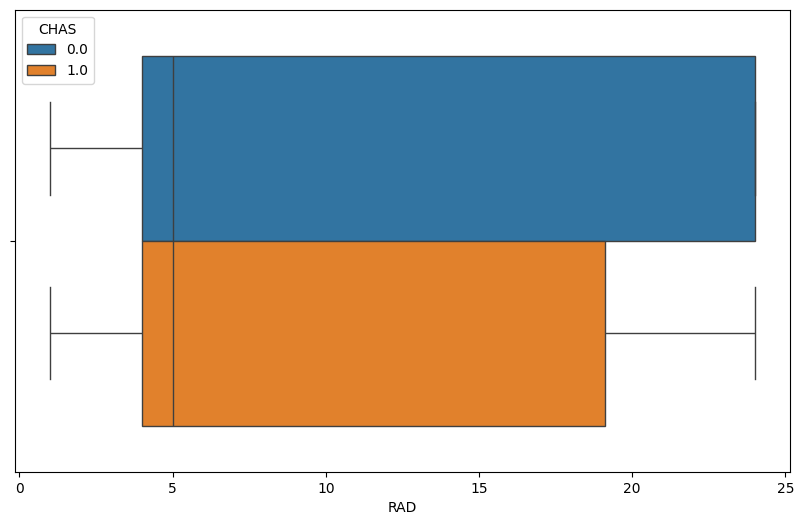

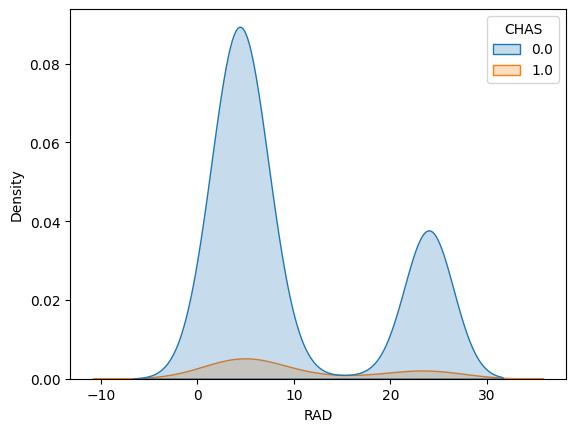

TAX
count    529.000000
mean     409.845029
std      168.143583
min      187.000000
25%      279.000000
50%      334.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64 



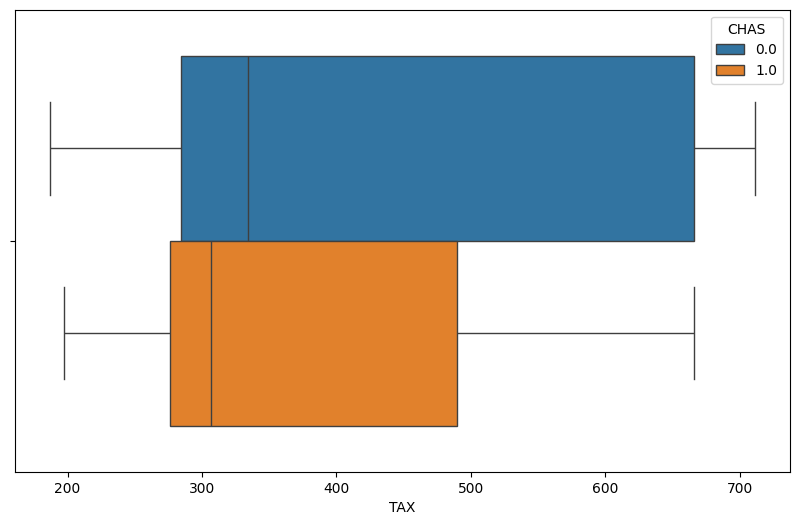

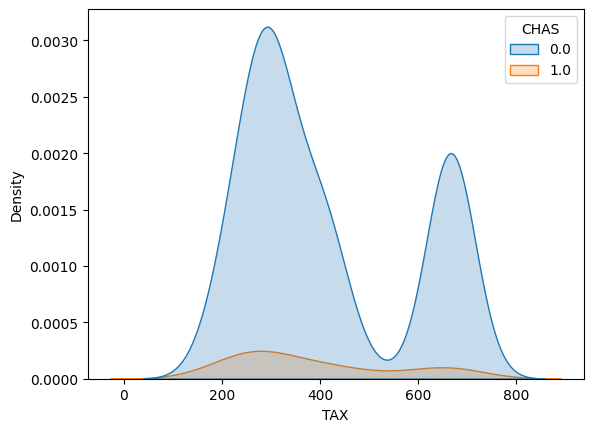

PTRATIO
count    526.000000
mean      18.424737
std        2.195524
min       12.600000
25%       17.000000
50%       19.000000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64 



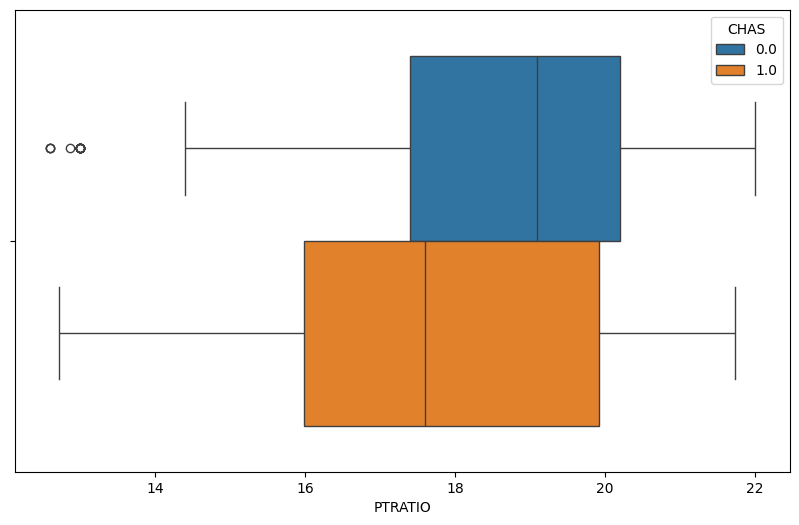

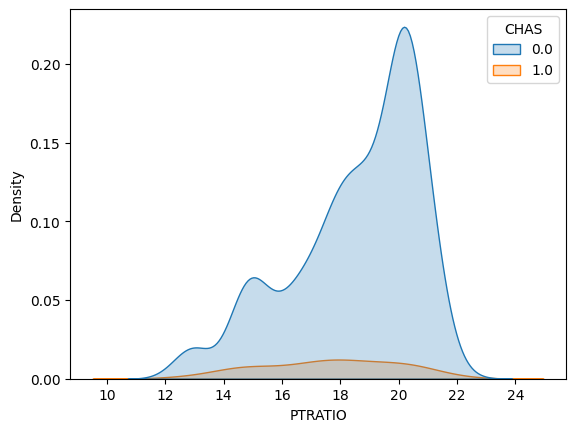

B
count    531.000000
mean     348.929309
std       98.630592
min        0.320000
25%      370.520000
50%      390.910000
75%      395.960000
max      396.900000
Name: B, dtype: float64 



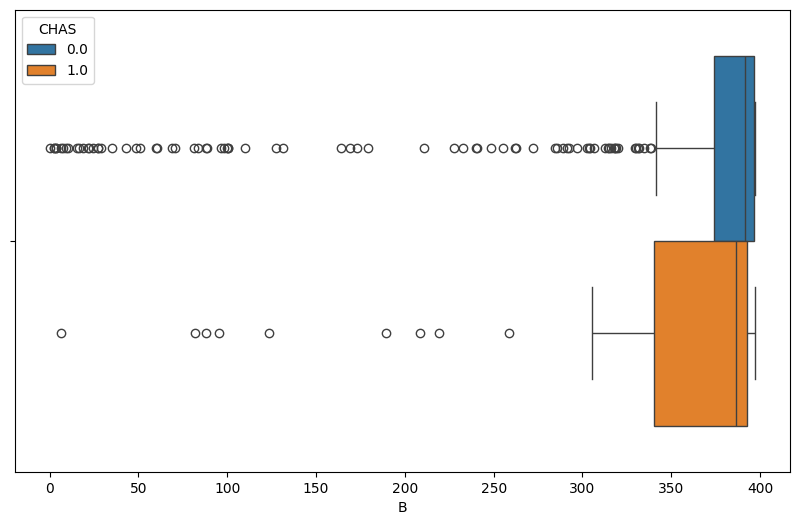

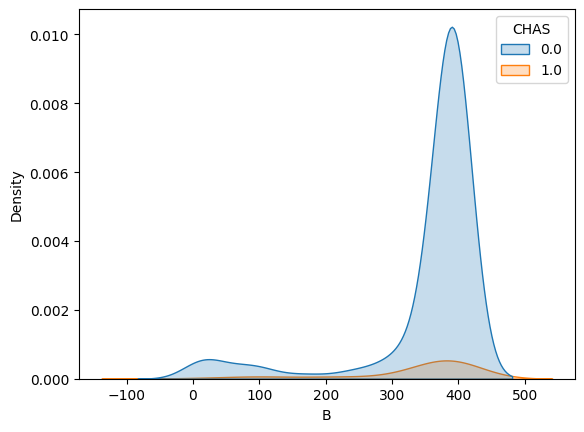

LSTAT
count    530.000000
mean      12.932321
std        7.507540
min        1.730000
25%        7.125000
50%       11.395000
75%       17.157500
max       37.970000
Name: LSTAT, dtype: float64 



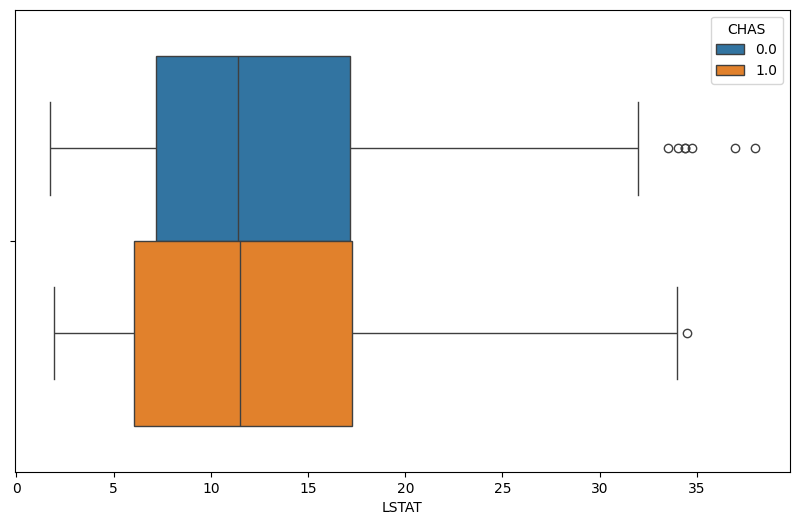

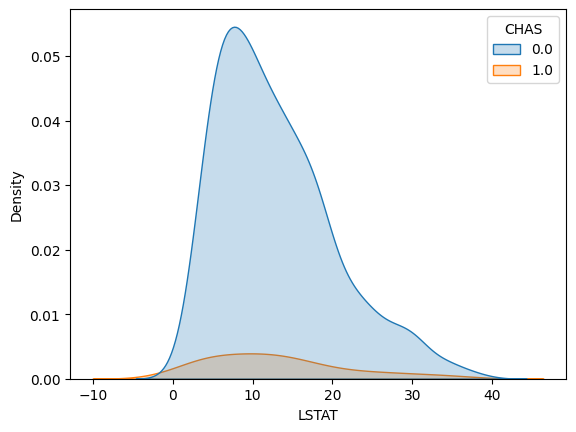

MEDV
count    532.000000
mean      22.754873
std        9.484397
min        5.000000
25%       16.775000
50%       21.300000
75%       26.250000
max       50.000000
Name: MEDV, dtype: float64 



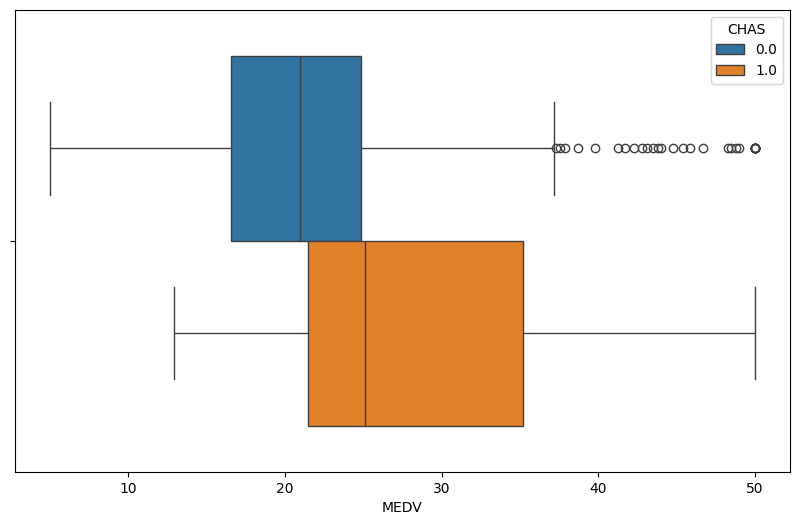

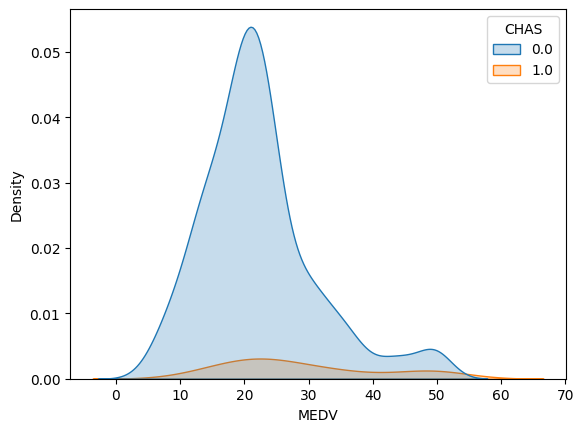

In [84]:
for columna in df:
  print(columna)
  print(df[columna].describe(),'\n')
  plt.figure(figsize=(10,6))
  sns.boxplot(data= df, x=columna, hue='CHAS')
  plt.show()
  #sns.kdeplot(data=df[columna],fill=True)
  sns.kdeplot(data=df,x=columna,fill=True,hue='CHAS')

  plt.show()

# Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)